# Homework 12

Finish the development of your code to construct persistence diagrams.

Use your code to examine some data and find persistent homologies, and do some simple analysis.

Your code must do all the following:

1. Read in the data.  CSV files (M_data<indexnumber>.csv) have been uploaded to the blackboard site. These files are comma separated value files, have no text header row, so you need to know each row starts with an identifier number and then has the 10-dimensional feature vector of the data. Each file has something like 75 items.

2. Use a Euclidean metric (without any scaling or taking out correlations).

3. Rank order the metric distances from point to point, so you can filter on thresholds from below the minimum space between any two points to above the maximum space between any two points.

4. For each value of the threshold (it your code runs fast enough step the threshold between every value the metric distance takes), construct a simplicial complex. It can be any complex construction, but make sure it at least includes 0, 1, 2, and 3 dimensional simplices. I have not examined what happens in dimensions higher than 4 dimensional simplices, but feel free to find out and share with all of us. If your code is slow, try to have enough instances through the filtration to be able to find interesting persistent homologies.

5. For each step in the filtration, find the simplicial complex, compute the Euler characteristic, find the homologies, find the ranks of all the homologies, check that the characteristic of the ranks is consistent with the Euler characteristic (a good check to see your code works properly). You need to at least have H0, H1, and H2, but if you can go farther share what you find.

6. Construct some representation of the persistence diagram, and output this. If possible, output it in such a way as can be run through something to graph it or otherwise analyze it, or alternately, graph it in your code.

7. Determine which homologies are persistent and figure out what you can from them. Then provide an analysis of the data.  For example, you may say ‘there seem to be n types of data similar to each other’.  See if you can determine what it means in some sense.

In [1]:
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import numpy as np

import sys, os
tim_path = 'C:\\Users\\Tim\\PycharmProjects\\625.687\src'
ben_path = '/Users/ben/Documents/625.687/src'

if os.path.exists(tim_path):
    sys.path.append(tim_path) # your local repo here
elif os.path.exists(ben_path):
    sys.path.append(ben_path)
else:
    print("Problem accessing src directory.")

In [2]:
from utils import *
import Metrics

## 1. Read in the Data

In [3]:
from glob import glob

datasets = {}
for fname in glob('../data/*.csv'):
    _id = fname.split('/')[-1].split('.')[0].split('data')[-1]
    df = pd.read_csv(fname, names=['r']+[f'f{i}' for i in range(1,11)], index_col=0)
    datasets[_id] = {'data': df}

In [4]:
for df in datasets:
    print(datasets[df]['data'].head())

         f1        f2        f3        f4        f5        f6        f7  \
r                                                                         
1  0.841464  1.311094  2.662422 -1.568054 -0.404108 -2.475253 -1.932087   
2  0.661671  1.702766  2.610921 -1.397946 -1.088667 -2.347672 -1.929252   
3  0.668363  2.221491  2.160714 -0.750779 -1.702540 -1.788230 -2.298690   
4  0.715636  2.371512  2.206615 -0.602472 -2.536616 -1.426515 -2.174885   
5  0.381479  2.691894  1.788278 -0.271486 -2.782082 -0.867906 -1.941072   

         f8        f9       f10  
r                                
1  1.676782  0.092218 -0.282458  
2  1.371181  0.071575 -0.477818  
3  1.382075  0.481905 -0.548661  
4  0.718085  0.669810 -0.730278  
5  0.357116  0.996432 -1.005211  
         f1        f2        f3        f4        f5        f6        f7  \
r                                                                         
1 -0.930424 -2.469092  0.337588 -0.311697 -1.658120 -0.553220 -1.173736   
2 -1.558283

## 2. Use a Euclidean Metric

The general process for this step will be defined by the function below:

In [5]:
mf = Metrics.Metric()

def create_distance_matrix(df, verbose=False):
    dmatrix = []
    for index1, row1 in df.iterrows():
        metric_scores = []
        for index2, row2 in df.iterrows():
            score = mf.L_2_norm(row1, row2)
            metric_scores.append(score)
        dmatrix.append(metric_scores)

    if verbose:
        for row in dmatrix[:5]:
            print(row[:5])
    return dmatrix

Now, applying this function to all datasets:

In [6]:
for ds in datasets:
    datasets[ds]['dmatrix'] = create_distance_matrix(datasets[ds]['data'])

## 3. Rank Order the Metric Distances

First, we will define a function to take a dataset's distance matrix (as generated in step 2) and flatten it to produce a list of distances, plotting a distribution of the distances. The function will return a list of these distances to be stored to the dataset's dictionary for later use.

In [7]:
def analyze_dmatrix(dmatrix, plot=True):
    distances = []
    for r, row in enumerate(dmatrix):
        for c, col in enumerate(row[r+1:]):
            distances.append(col)
    
    print(f"{min(distances)} <= $d$ <= {max(distances)}")
    if plot:
        plt.hist(distances, color='dimgray')

        plt.title(r"$\rho$ Distribution")
        plt.xlabel(r"$\rho$")
        plt.ylabel("Frequency")
        plt.show()

    return distances

In [8]:
def analyze_dmatrix2(dmatrix):
    distances = []
    for r, row in enumerate(dmatrix):
        for c, col in enumerate(row[r+1:]):
            distances.append(col)

analyze_dmatrix2(datasets['19112']['dmatrix'])

Now, running this analysis for each dataset, storing the distance array to the dataset's dictionary:

49242 distance distribution:
2.129654345332516 <= $d$ <= 28.46367331944405


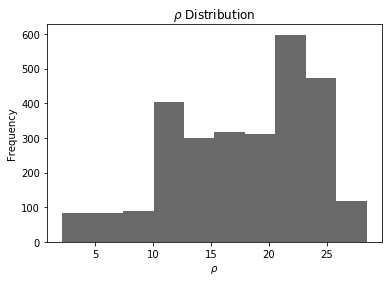


19112 distance distribution:
2.1850593389640007 <= $d$ <= 28.745618744219676


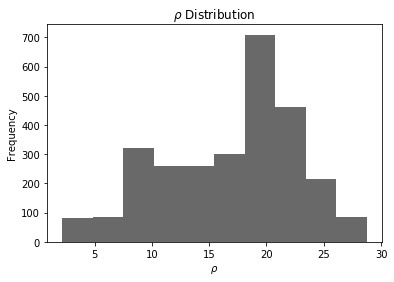


89116 distance distribution:
2.105309798347382 <= $d$ <= 29.616878735153303


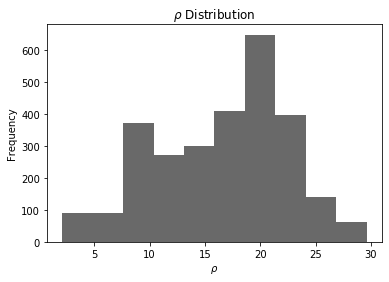


89329 distance distribution:
6.682351320586972 <= $d$ <= 28.128777375456156


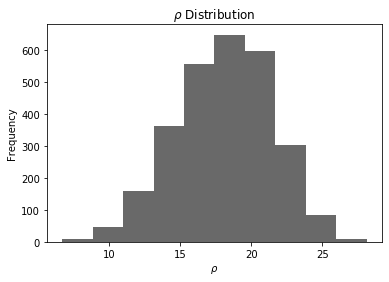


29313 distance distribution:
6.759909318468317 <= $d$ <= 27.071836995131168


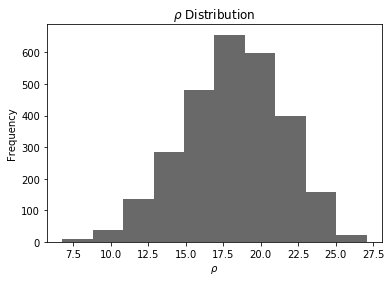


59155 distance distribution:
2.2324852045192194 <= $d$ <= 28.64248711783455


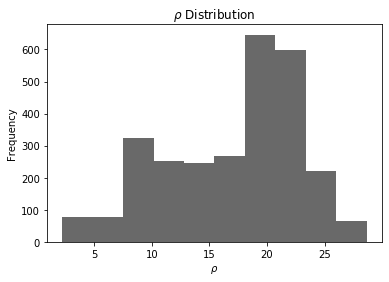


93462 distance distribution:
0.920262235350684 <= $d$ <= 17.652255845218377


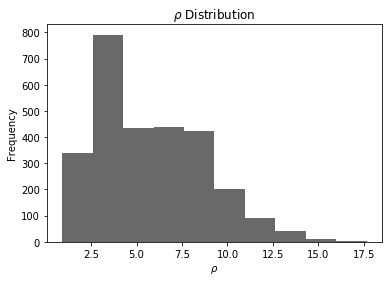


39475 distance distribution:
0.4625312903567421 <= $d$ <= 16.53048569872898


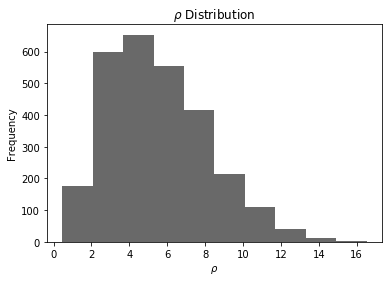


69490 distance distribution:
0.30657924356585625 <= $d$ <= 17.097312992479853


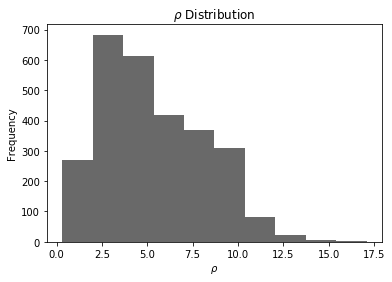


79261 distance distribution:
1.9845560283333863 <= $d$ <= 28.375946700387736


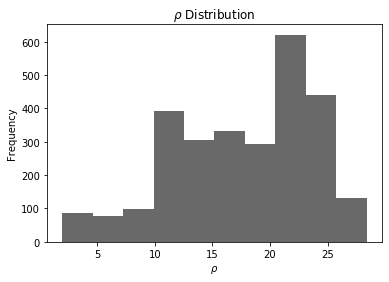


91252 distance distribution:
1.9380964876860194 <= $d$ <= 27.975676451278197


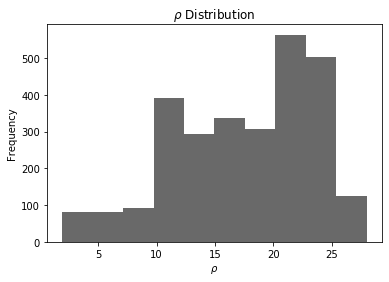


97323 distance distribution:
6.247960647408922 <= $d$ <= 27.182230239237732


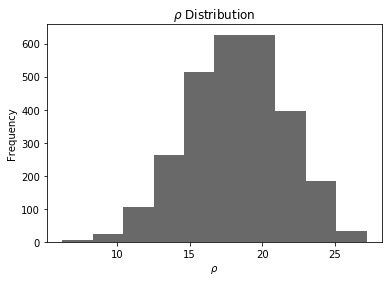

In [9]:
for _id in datasets:
    print(f"{_id} distance distribution:")
    distances = analyze_dmatrix(datasets[_id]['dmatrix'])
    datasets[_id]['distances'] = distances
    print()

These histograms can help provide insight as to the filtration steps at which a significant amount of coalescence will take place.

## 4. Construct a Simplicial Complex

We'll begin by defining a function to handle the generation of balls for a given radius on a dmatrix, as well as a function to generate a simplicial complex from the set of those balls.

In [10]:
def find_balls(dmatrix, radius):
    balls = set()
    for i in range(len(dmatrix)):
        ball_centered_around_i = set()
        for j in range(len(dmatrix)):
            if dmatrix[i][j] <= radius: 
                ball_centered_around_i.add(j)
        ball = tuple(sorted(ball_centered_around_i))
        balls.add(ball)
    return balls

In [11]:
from itertools import combinations

def generate_simplicial_complex(balls, max_dim=3, verbose=False):
    """
    Treat each set like it represents a simplicial complex, and generate inclusion power sets all the way down
    (simplicial complexes are closed under intersection; if (abc), then (ab), (ac), and (bc) must be in the set)
    """
    combs = set()
    for simplicial_complex in balls:
        if verbose:
            print(simplicial_complex, "\n")
        for i in range(1, max_dim+2):
            i_length_combos = combinations(simplicial_complex, i)
            for combo in i_length_combos:
                combs.add(tuple(sorted(combo)))
    return combs



Here, we use these functions to build a set of complexes at some subset of the distances at which coalescence occurs in the first dataset, as given by the list `distance` in the dataset's dictionary:

In [12]:
def generate_bbmatrix(datasets, _id, step_size=5, max_dim=2):
    ds = datasets[_id]
    dist_set = list(sorted({d for d in ds['distances']}))
    trunc_dist = [0] + [d for d in dist_set[::step_size]]
    
    # Aggregate boundary matrices
    big_boundary = np.array([[0 for d in range(len(trunc_dist))] for v in find_balls(ds['dmatrix'], 0)], dtype=np.int8)
    blank_row    = np.array([0 for d in range(len(trunc_dist))], dtype=np.int8)

    prev_cmplx = {v for v in find_balls(ds['dmatrix'], 0)}    
    smplx_to_r = {smplx:r for r, smplx in zip(range(len(prev_cmplx)), prev_cmplx)}
    r_to_smplx = {smplx_to_r[smplx]:smplx for smplx in smplx_to_r}

    # Create dictionary to track lifespan of simplices.
    smplx_lives = {v:[0, None] for v in find_balls(ds['dmatrix'], 0)}

    for d, dist in enumerate(trunc_dist):
        # Generate simplicial compexes at each filtration step
        balls = find_balls(ds['dmatrix'], dist)
        cmplx = generate_simplicial_complex(balls, max_dim=max_dim)
        
        # Compute the Euler characteristic of the complex
        euler_char = sum([1*((-1)**(len(s)-1)) for s in cmplx])
        print(f"Euler Characteristic at {dist}: {euler_char}")
        
        # Compute the homologies and find their ranks 
        # TODO

        # Now, for the formation of the big boundary matrix itself
        # For each new simplex in the complex, add a row and mark its
        # constituents (1 dimension lower) as absorbed at this distance.
        new_smplces = cmplx - prev_cmplx
        for s in new_smplces:
            smplx_lives[s] = [dist, None]
            for boundary in combinations(s, len(s)-1):
                # Add boundary to dictionaries and matrix if not yet present.
                if boundary not in smplx_to_r:
                    smplx_to_r[boundary] = len(smplx_to_r)
                    r_to_smplx[smplx_to_r[boundary]] = boundary
                    big_boundary = np.vstack((big_boundary, blank_row))
                    cmplx.add(boundary)
                # If boundary is still alive, kill it.
                if boundary not in smplx_lives:
                    smplx_lives[boundary] = [dist, dist]
                elif smplx_lives[boundary][1] == None:
                    smplx_lives[boundary][1] == dist
                # Mark constituent boundary for absorbtion at this distance.
                big_boundary[smplx_to_r[boundary]][d] = 1
            big_boundary = np.vstack((big_boundary, blank_row))
            # Add a new lookup to the dictionaries
            smplx_to_r[s] = len(smplx_to_r) + 1
            r_to_smplx[smplx_to_r[s]] = s
        prev_complex = cmplx
    
    # Finally, save our results
    datasets[_id]['bbmatrix']    = big_boundary
    datasets[_id]['smplx_to_r']  = smplx_to_r
    datasets[_id]['r_to_smplx']  = r_to_smplx
    datasets[_id]['trunc_dist']  = trunc_dist
    datasets[_id]['smplx_lives'] = smplx_lives

    return datasets

Due to computational expense, we will only be able to compute edges.

In [13]:
for _id in datasets.keys():
    print(_id)
    datasets = generate_bbmatrix(datasets, _id, step_size = 146, max_dim=1)

49242
Euler Characteristic at 0: 75
Euler Characteristic at 2.129654345332516: 74
Euler Characteristic at 6.162060251654413: -218
Euler Characteristic at 10.578770887812968: -653
Euler Characteristic at 11.302231489379277: -1260
Euler Characteristic at 12.002549763153107: -1554
Euler Characteristic at 13.142539597828465: -1908
Euler Characteristic at 14.639625339869395: -2198
Euler Characteristic at 15.878673001833116: -2472
Euler Characteristic at 17.056285323674167: -2594
Euler Characteristic at 18.24977813649425: -2683
Euler Characteristic at 19.383357490471198: -2700
Euler Characteristic at 20.81658817464832: -2700
Euler Characteristic at 21.69776991413368: -2700
Euler Characteristic at 22.18304228236235: -2700
Euler Characteristic at 22.707954479608137: -2700
Euler Characteristic at 23.218851107542598: -2700
Euler Characteristic at 23.81415976868057: -2700
Euler Characteristic at 24.47028110967339: -2700
Euler Characteristic at 25.523207625310256: -2700
Euler Characteristic at 28.

Here, we implement the boundary matrix reduction algorithm based on Fig 13.2 in Edelsbrunner. We first try out the reduction over a test matrix:

In [14]:
import copy

test_B = [[0,0,0,1,0,0,1,0,1,0,0,0,0,0,0],
          [0,0,0,0,1,0,0,1,1,0,0,0,0,0,0],
          [0,0,0,1,1,0,0,0,0,0,1,0,0,0,0],
          [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0],
          [0,0,0,0,0,0,0,0,0,0,0,1,0,1,0],
          [0,0,0,0,0,0,1,1,0,0,1,0,0,0,0],
          [0,0,0,0,0,0,0,0,0,1,0,0,1,0,0],
          [0,0,0,0,0,0,0,0,0,1,0,1,0,0,0],
          [0,0,0,0,0,0,0,0,0,1,0,0,0,1,0],
          [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
          [0,0,0,0,0,0,0,0,0,0,0,1,1,0,0],
          [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
          [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
          [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
          [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
test_B = np.array(test_B)

column_sums = {d:[d] for d in range(1,16)}
test_R = copy.copy(test_B)
for c in range(len(test_R[0])):
    # Identify pivot for the column.
    pivot = None
    for r in range(len(test_R)):
        if test_R[r][c] == 1:
            pivot = r
    # For all previous columns in the matrix:
    if pivot != None:
        reset = True
        while reset and pivot != None:
            reset = False
            for cc in range(c):
                # If an earlier pivot is found...
                if test_R[pivot][cc] == 1 and \
                    sum([row[cc] for row in test_R[pivot+1:]]) == 0:
                    # Add each row value to the corresponding value
                    # in the current column.
                    for rr in range(len(test_R)):
                        test_R[rr][c] ^= test_R[rr][cc]
                    column_sums[c+1] = column_sums[cc+1] + column_sums[c+1]
                    reset, pivot = True, None
                    for r in range(len(test_R)):
                        if test_R[r][c] == 1:
                            pivot = r
                    break

print("Reduced matrix:")
print(test_R)
print("Bookkeeping indices:")
print(column_sums)

Reduced matrix:
[[0 0 0 1 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
Bookkeeping indices:
{1: [1], 2: [2], 3: [3], 4: [4], 5: [4, 5], 6: [6], 7: [7], 8: [4, 5, 7, 8], 9: [4, 5, 9], 10: [10], 11: [4, 7, 11], 12: [12], 13: [12, 13], 14: [12, 13, 10, 14], 15: [15]}


It works! Now, creating a function to run the algorithm on all datasets:

In [15]:
from copy import copy

def reduce_bbmatrix(datasets, _id):
    bbmatrix = datasets[_id]['bbmatrix']
    smplx_to_r = datasets[_id]['smplx_to_r']
    r_to_smplx = datasets[_id]['r_to_smplx']
    trunc_dist = datasets[_id]["trunc_dist"]

    column_sums = {d:[d] for d in range(1, len(bbmatrix[0])+1)}
    rbmatrix = copy(bbmatrix)
    for c in range(len(rbmatrix[0])):
        # Identify pivot for the column.
        pivot = None
        for r in range(len(rbmatrix)):
            if rbmatrix[r][c] == 1:
                pivot = r
        # For all previous columns in the matrix:
        if pivot != None:
            reset = True
            while reset and pivot != None:
                reset = False
                for cc in range(c):
                    # If an earlier pivot is found...
                    if rbmatrix[pivot][cc] == 1 and \
                        sum([row[cc] for row in rbmatrix[pivot+1:]]) == 0:
                        # Add each row value to the corresponding value
                        # in the current column.
                        for rr in range(len(rbmatrix)):
                            rbmatrix[rr][c] ^= rbmatrix[rr][cc]
                        column_sums[c+1] = column_sums[cc+1] + column_sums[c+1]
                        reset, pivot = True, None
                        for r in range(len(rbmatrix)):
                            if rbmatrix[r][c] == 1:
                                pivot = r
                        break

    datasets[_id]['rbmatrix'] = rbmatrix
    datasets[_id]['column_sums'] = column_sums
    return datasets

def generate_matrix_from_column_sums(column_sums):
    index_matrix = np.zeros([len(column_sums), len(column_sums)])
    for column_index, index_list in column_sums.items():
        for j in index_list:
            index_matrix[column_index-1][j-1] = 1  # indexing starts from zero
    return index_matrix

for _id in datasets.keys():
    datasets = reduce_bbmatrix(datasets, _id)

## 5. Computations

Some objects of interest were calculated along the way in the filtration:

* Each simplicial complex is contained within the dataset's dictionary, and there is no clean way to display them here.
* Euler Characteristics are shown above as output (see codeblock ).

Additionally, some calculations are covered in section 6. To begin, we'll define a function to attempt to extract the relevant information from the datasets and the computations done above in order to calculate homologies.

In [16]:
def find_homologies(reduced_boundary_matrix, column_sums):
    for column_index in range(0, len(reduced_boundary_matrix[0])):
        homology_birth = True
        for i in range(len(reduced_boundary_matrix)):
            if reduced_boundary_matrix[i][column_index] == 1:
                homology_birth = False
        print(homology_birth)
        
find_homologies(datasets['19112']['rbmatrix'], datasets['19112']['column_sums'])

True
False
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


Printing the "head" and "tail" of the reduced boundary matrix for the first dataset, 19112:

In [17]:
for row in datasets['19112']['rbmatrix'][:20]:
    print(row)
print("...")
for row in datasets['19112']['rbmatrix'][20:]:
    print(row)

 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0

This appears to have not worked. We suspect the issue is possibly due to the fact that we needed to aggregate distances in order to make the computation tractable. This aggregation causes the birth and death columns to be intertwined, and the computation to disentangle them does not appear to be, at the very least, straightforward.

## 6. Persistence Diagrams

Below we have an attempt at the creation of a persistence diagram using a field computed above, called `smplx_lives`, aimed at finding the birth and death of a given simplex.

2775


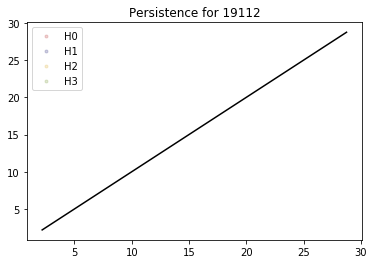

In [18]:
def persistence_diagram(datasets, _id, plot=True):
    smplx_lives = datasets[_id]['smplx_lives']
    H = {0:{'bs':[], 'ds':[]},
         1:{'bs':[], 'ds':[]},
         2:{'bs':[], 'ds':[]},
         3:{'bs':[], 'ds':[]}}
    colors = ['firebrick', 'midnightblue', 'goldenrod', 'olivedrab']
    for s in smplx_lives:
        dim = len(s)-1
        b = smplx_lives[s][0]
        d = smplx_lives[s][1]
        H[dim]['bs'].append(b)
        H[dim]['ds'].append(d)

    print(len(H[1]['bs']))

    if plot:
        for dim in H:
            plt.plot(H[dim]['bs'], H[dim]['ds'], '.', color=colors[dim],
                alpha=.2, label=f'H{dim}')
        
        plt.plot([min(datasets[_id]['distances']), max(datasets[_id]['distances'])],
                 [min(datasets[_id]['distances']), max(datasets[_id]['distances'])],
                 color='k')
        plt.title(f"Persistence for {_id}")
        plt.legend()
        plt.show()

persistence_diagram(datasets, '19112')

Clearly, there were some issues here...

Continuing with some help from `scikit-tda` (a Python wrapper for `Ripser`), we calculate the persistence diagrams for the datasets:

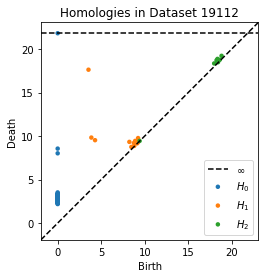

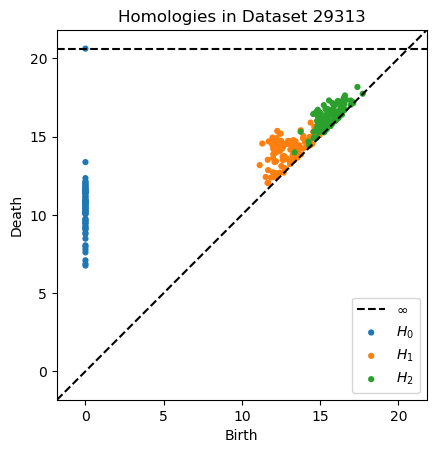

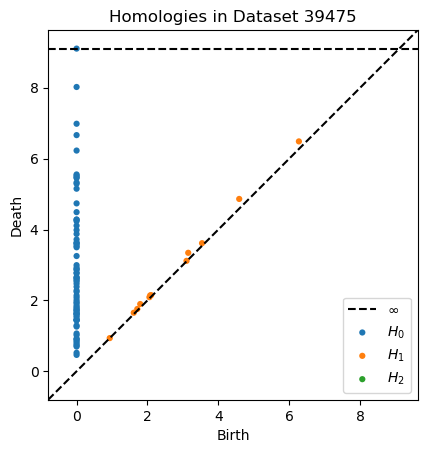

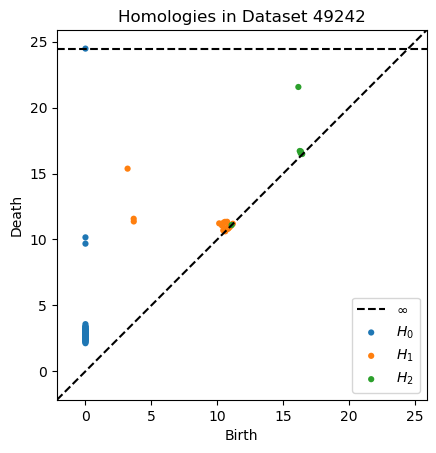

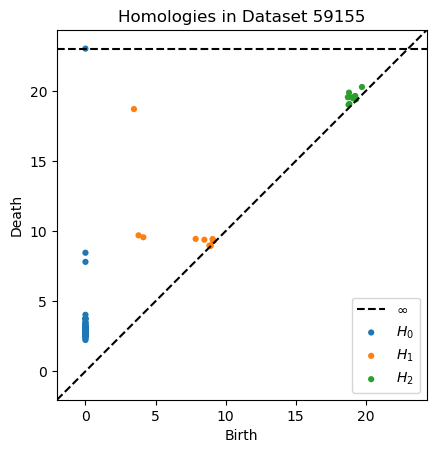

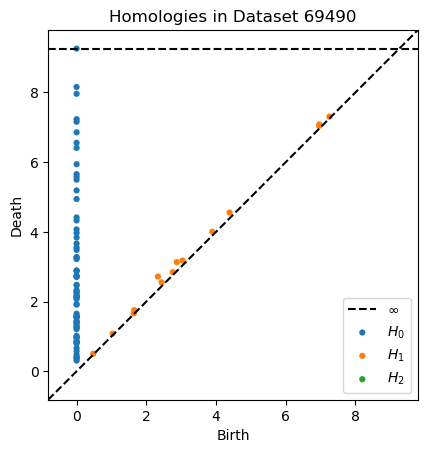

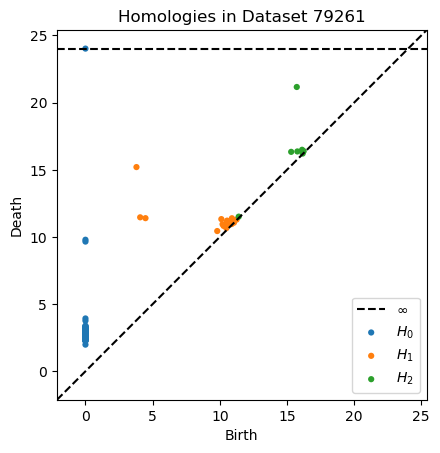

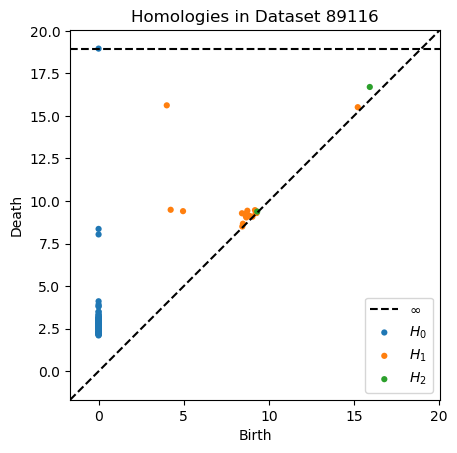

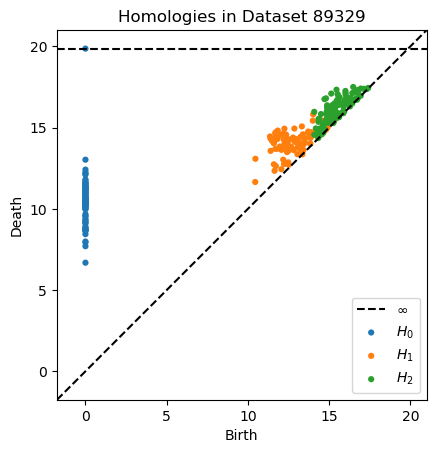

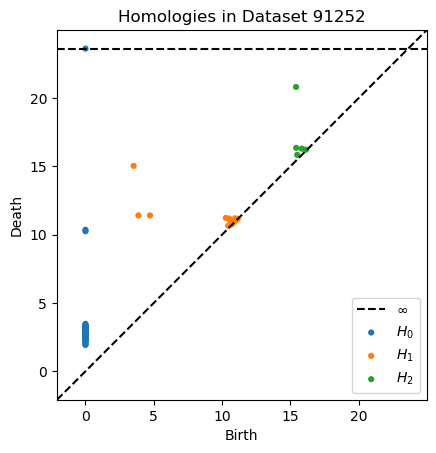

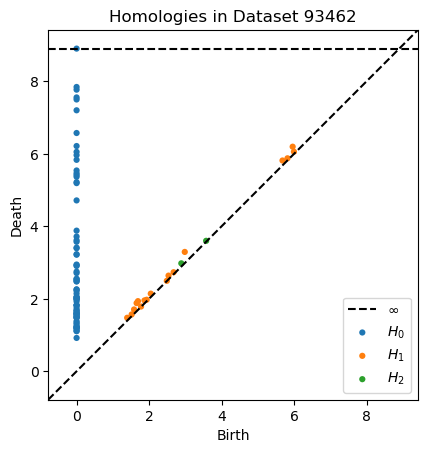

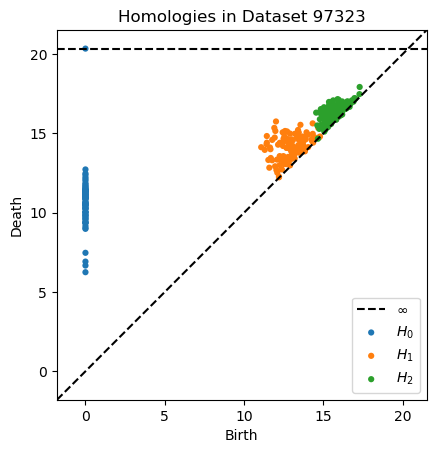

In [19]:
from ripser import ripser
from persim import plot_diagrams
import numpy as np

dataset_ids = sorted(datasets.keys())
dmatrices = [datasets[x]['dmatrix'] for x in dataset_ids]
    
for i in range(len(dmatrices)):
    matrix = np.asarray(dmatrices[i])
    res = ripser(matrix, distance_matrix=True, maxdim=2)
    plot_diagrams(res['dgms'], show=True, title="Homologies in Dataset {}".format(dataset_ids[i]))

In addition, we've wrote an additional function to take output of Ripser and generate a Barcode diagram:

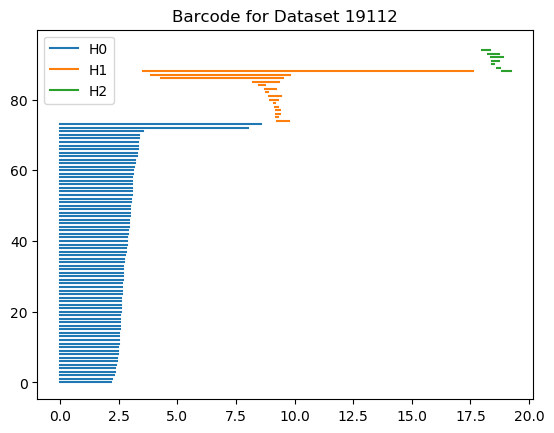

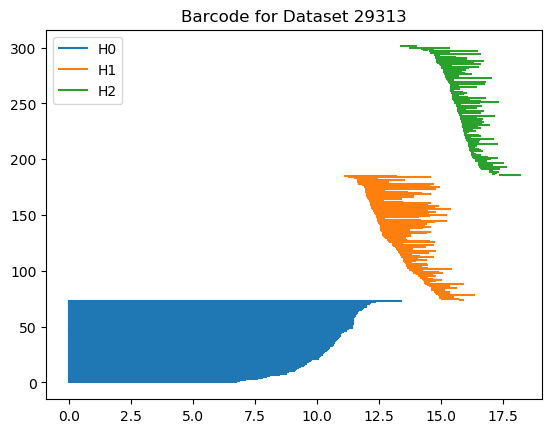

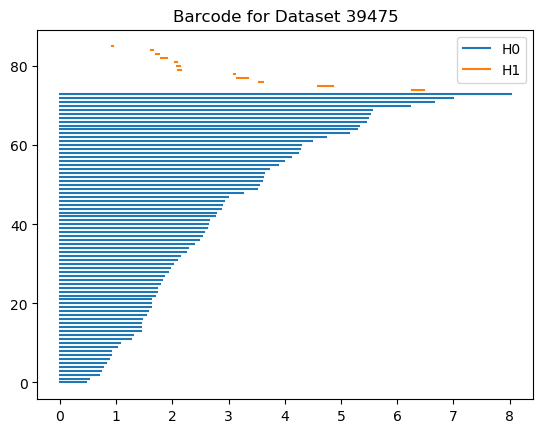

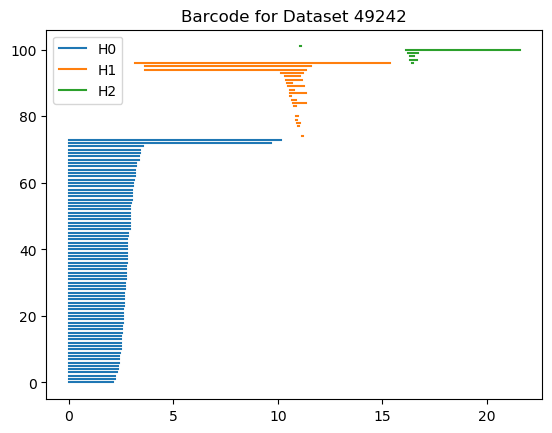

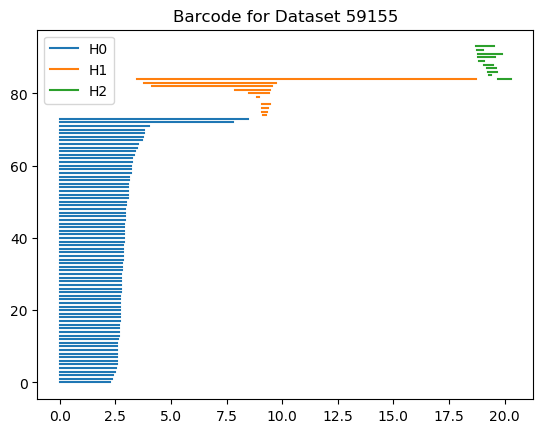

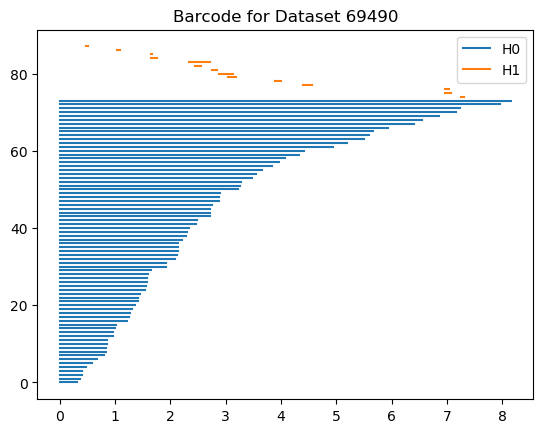

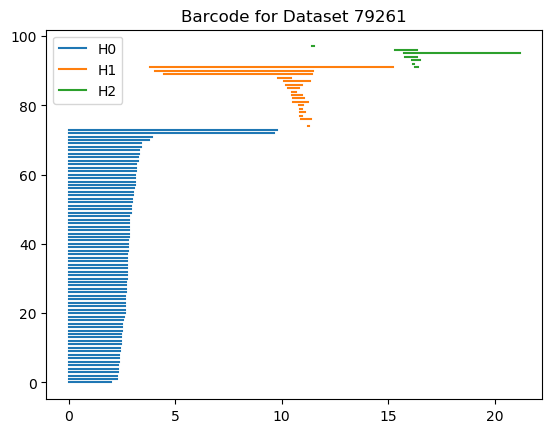

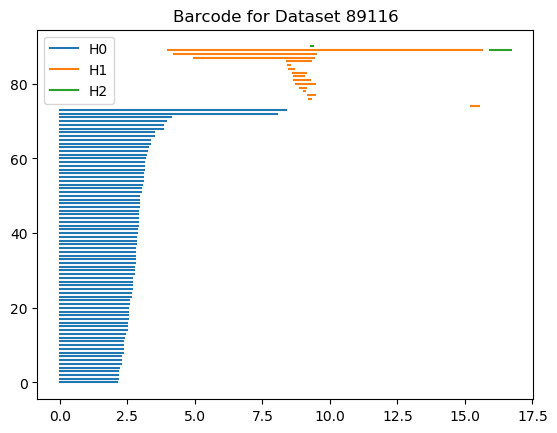

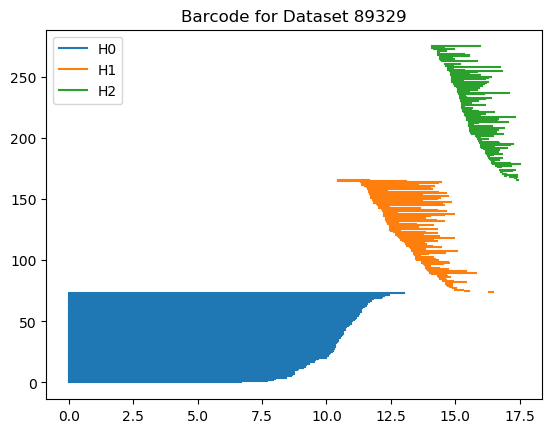

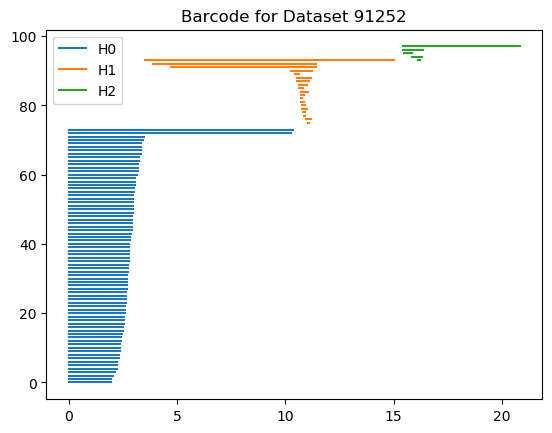

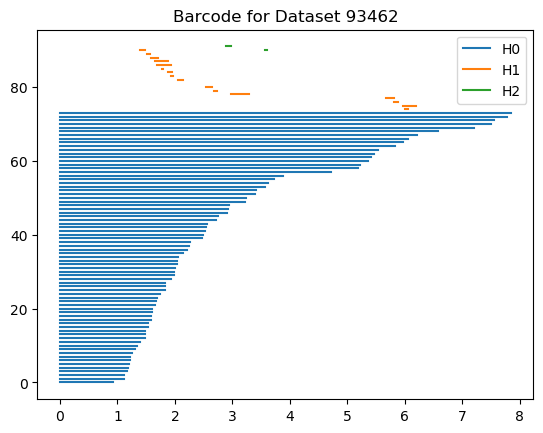

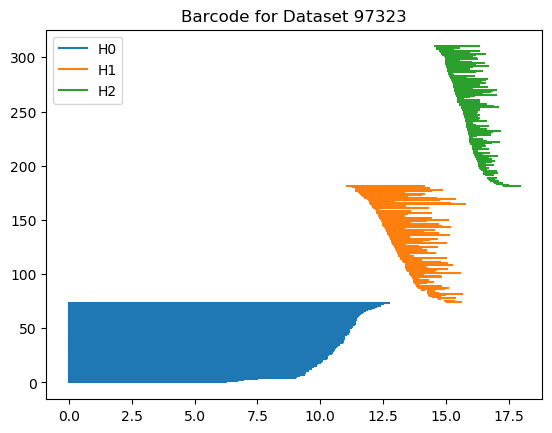

In [20]:
import matplotlib.pyplot as plt

def barcode(dgms, _id, show=True):
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
    baseline = 0
    for d, homology in enumerate(dgms):
        for e, ele in enumerate(homology):
            if e != 0:
                plt.plot([ele[0], ele[1]], [baseline+e, baseline+e],
                        color=colors[d])
            else:
                plt.plot([ele[0], ele[1]], [baseline+e, baseline+e],
                        color=colors[d], label=f"H{d}")
        baseline += e
    if show:
        plt.legend()
        plt.title(f"Barcode for Dataset {_id}")
        plt.show()

for i in range(len(dmatrices)):
    matrix = np.asarray(dmatrices[i])
    res = ripser(matrix, distance_matrix=True, maxdim=2)
    barcode(res['dgms'], dataset_ids[i])

Finally, we show a graph of how homology ranks change over time for each of the datasets:

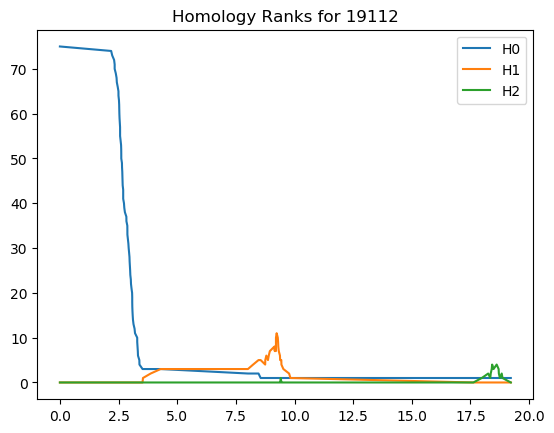

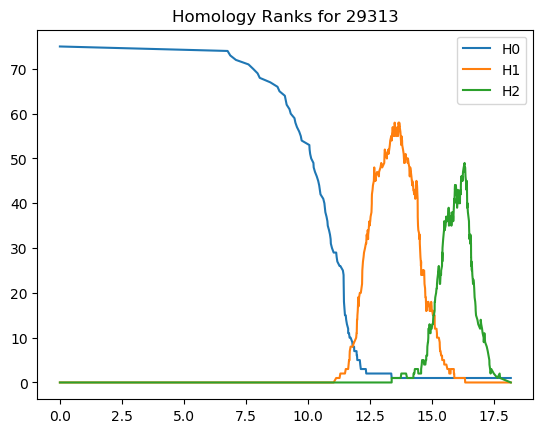

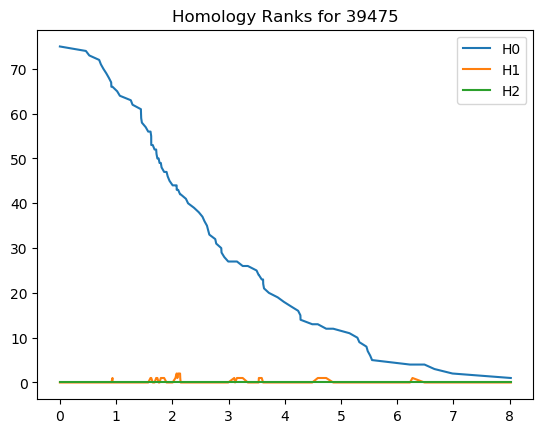

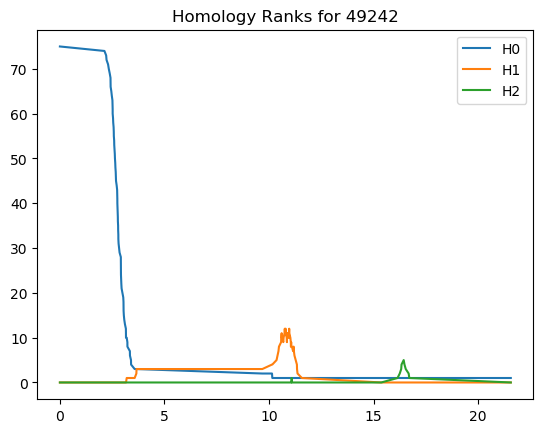

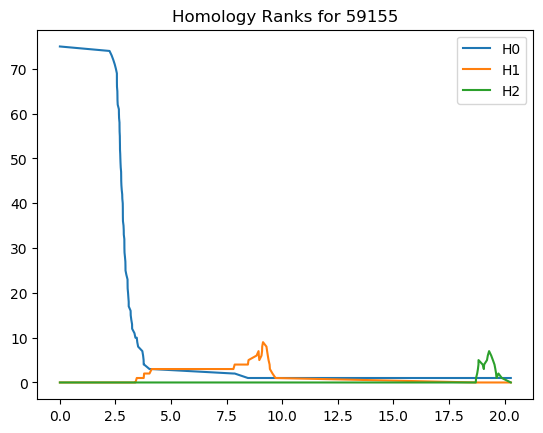

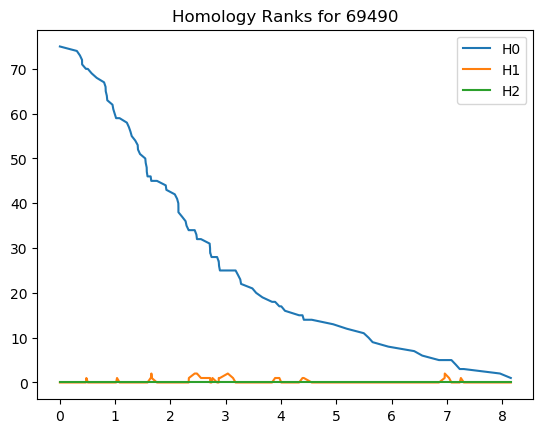

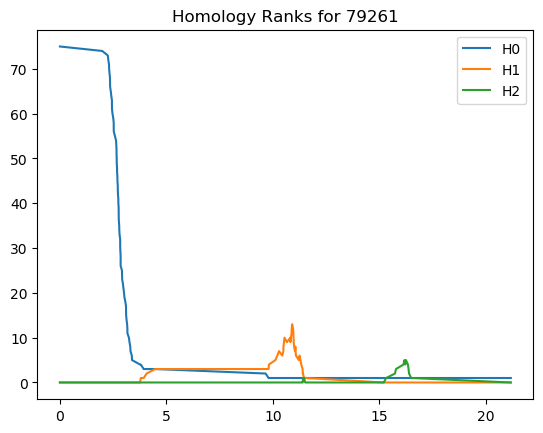

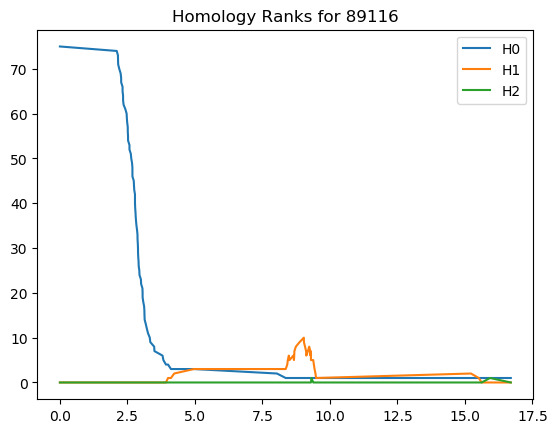

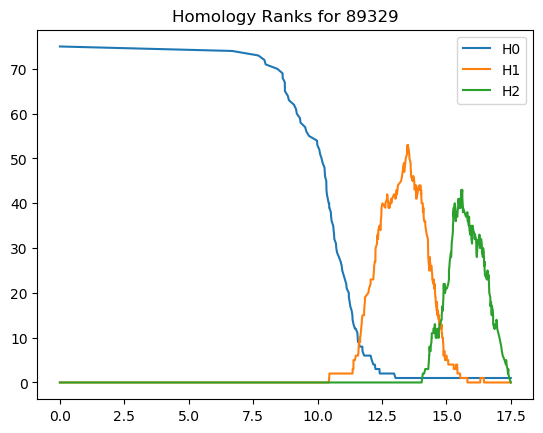

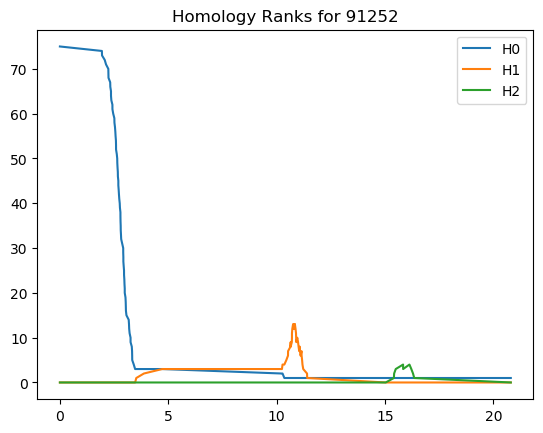

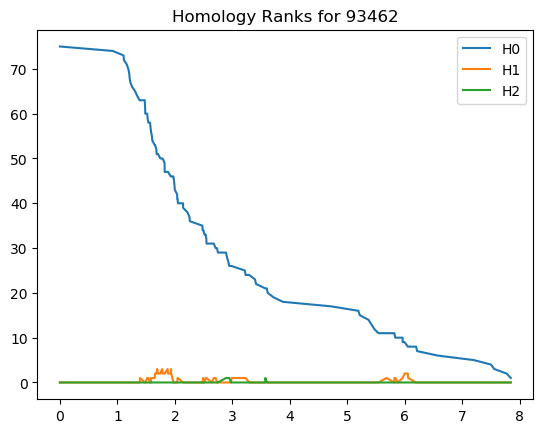

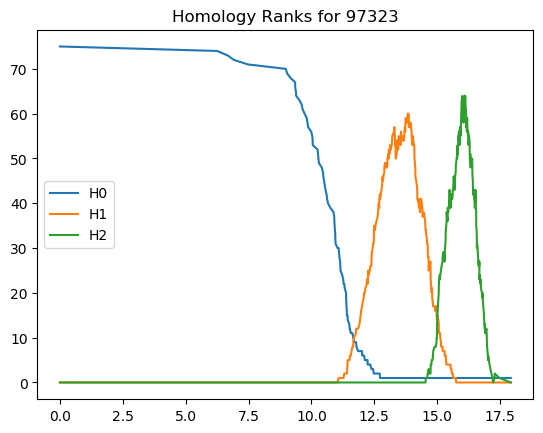

In [22]:
def homology_ranks(dgms, _id, show=True):
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
    baseline = 0
    agg = {0:{}}
    # For each homology in the array from Ripser
    for dim, homology in enumerate(dgms):
        # Collect all of the distances for births...
        dists = {span[0] for span in homology}
        # ...and deaths...
        dists = dists.union({span[1] for span in homology if span[1] != 'inf'})
        # Sort the distances and add to the aggregate dictionary.
        for d in dists:
            agg[d] = {}
    
    for dim, homology in enumerate(dgms):
        # Count the number of elements alive at distance d
        count = []
        for dist in sorted(agg):
            cnt = len([h for h in homology if h[0] <= dist and dist < h[1]])
            agg[dist][dim] = cnt
        # Add the counts to the plot.
        plt.plot(sorted([d for d in agg]), [agg[d][dim] for d in sorted(agg)],
                color=colors[dim], label=f"H{dim}")
    if show:
        plt.legend()
        plt.title(f"Homology Ranks for {_id}")
        plt.show()

    # Various other computations:
    for dist in agg:
        e_ch = sum([((-1)**dim)*agg[dist][dim] for dim, _ in enumerate(dgms)])
        agg[dist]['euler_char'] = e_ch

    return agg

for i in range(len(dmatrices)):
    matrix = np.asarray(dmatrices[i])
    res = ripser(matrix, distance_matrix=True, maxdim=2)
    homology_ranks(res['dgms'], dataset_ids[i])

## 7. Analysis

Based on the similarities in the structures found in the persistence diagrams, we can group the datasets into the following subsets of likely-similar data sources:
$$
\{19112, 49242, 59155, 79261, 89116, 91252\}
$$
$$
\{29313, 89329, 97323\}
$$
$$
\{39475, 69490, 93462\}
$$

These groupings are confirmed by the similarities in the `Barcode` and `Homology Rank` visualizations. Without some sort of knowledge of what each of the 10 features are, further assertions regarding the meaning of the persistent homologies is difficult.